In [31]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog

In [32]:
url = 'http://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []

for i in range(15):
  file = url + 'img{0:02d}.jpg'.format(i+1)
  img = imread(file)
  img = resize(img,(64,64))

  face_images.append(img)

In [33]:
face_images[0].shape

(64, 64, 3)

<Figure size 640x480 with 0 Axes>

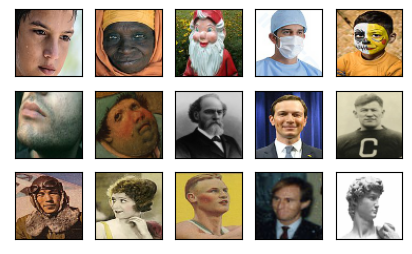

In [34]:
def plot_images(nRow, nCol, img):
  fig = plt.figure()
  fig, ax = plt.subplots(nRow, nCol, figsize = (nCol, nRow))
  for i in range(nRow):
    for j in range(nCol):
      if nRow <=1:axis = ax[j]
      else: axis = ax[i, j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      axis.imshow(img[i*nCol+j])

plot_images(3,5,face_images)


c:\Users\cau\anaconda3\envs\homework\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  import sys


<Figure size 640x480 with 0 Axes>

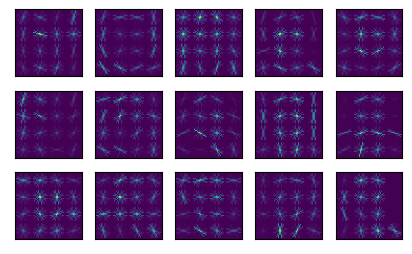

In [35]:
face_hogs = []
face_features = []

for i in range(15):
  hog_desc, hog_image = hog(face_images[i], orientations=8, 
                            pixels_per_cell=(16, 16), cells_per_block=(1, 1), 
                            visualize=True, multichannel=True) # 칼라 이미지 multichannel=True 설정
  face_hogs.append(hog_image)
  face_features.append(hog_desc)

plot_images(3, 5, face_hogs)

<Figure size 640x480 with 0 Axes>

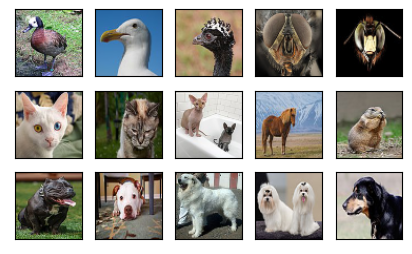

In [36]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'
animal_images = []

for i in range(15):
  file = url + 'img{0:02d}.jpg'.format(i+1)
  img = imread(file)
  img = resize(img, (64,64))
  animal_images.append(img)

plot_images(3, 5, animal_images)

c:\Users\cau\anaconda3\envs\homework\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  if __name__ == "__main__":


<Figure size 640x480 with 0 Axes>

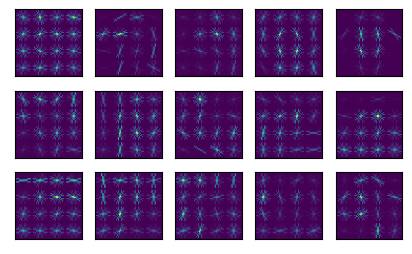

In [37]:
animal_hogs = []
animal_features = []

for i in range(15):
  hog_desc, hog_image = hog(animal_images[i], orientations=8, 

pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, 

multichannel=True)
  animal_hogs.append(hog_image)
  animal_features.append(hog_desc)

plot_images(3, 5, animal_hogs)

In [46]:
X, y = [], []
for feature in face_features:
  X.append(feature)
  y.append(1)
for feature in animal_features:
  X.append(feature)
  y.append(0)
  
print(len(X), len(y))
print(y) 


30 30
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [39]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
polynomial_svm_clf = Pipeline([
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(C=1, kernel = 'poly', degree=5, coef0=10.0))
                               ])
polynomial_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=10.0, degree=5, kernel='poly'))])

In [40]:
yhat = polynomial_svm_clf.predict(X)
print(yhat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<Figure size 640x480 with 0 Axes>

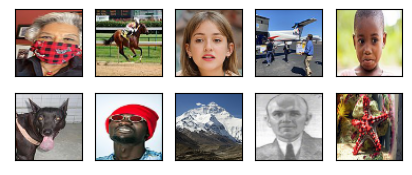

In [41]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'
test_images = []
for i in range(10):
  file = url + 'img{0:02d}.jpg'.format(i+1)
  img = imread(file)
  img = resize(img, (64,64))
  test_images.append(img)
plot_images(2, 5, test_images)


c:\Users\cau\anaconda3\envs\homework\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  


<Figure size 640x480 with 0 Axes>

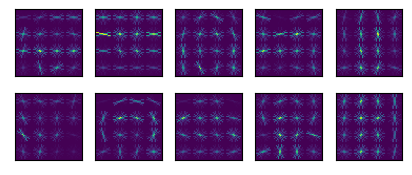

In [42]:
test_hogs = []
test_features = []

for i in range(10):
  hog_desc, hog_image = hog(test_images[i], orientations=8, pixels_per_cell=(16, 16), 
                            cells_per_block=(1, 1), visualize=True, multichannel=True)
  test_hogs.append(hog_image)
  test_features.append(hog_desc)
plot_images(2, 5, test_hogs)

In [43]:
test_result = polynomial_svm_clf.predict(test_features)
print(test_result)

[1 0 1 0 0 0 0 0 1 0]


<Figure size 640x480 with 0 Axes>

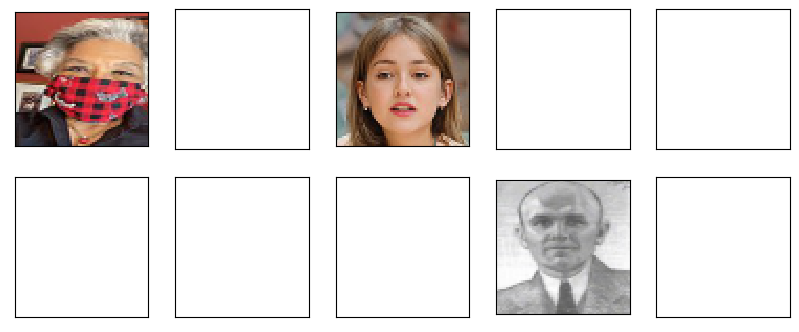

In [44]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
  for j in range(5):
    ax[i, j].get_xaxis().set_visible(False)
    ax[i, j].get_yaxis().set_visible(False)
    if test_result[i*5+j] == 1:
      ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')
